<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  INTRODUCTION

This notebook presents the implemention of the Logistic Regression model using the numpy library. The optimization algorithm choose for this work is gradient descent. Two variants of the algorithm were choosen: Batch gradient descent and Mini-batch gradient descent. Additionaly, two optimization algorithms were also implemented in this work: Gradient Descent with Momentum and Adptive Moment Estimation (Adam). 

For theoretical background of the gradient descent algorithms please refer to [Paper 1](https://arxiv.org/pdf/1609.04747.pdf) and [Coursera playlist](https://youtube.com/playlist?list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)

A synthetic data set is created to test the algorithms implemented in this notebook. [HW1_ML] implements the algorithms with a real data set. 

### ALGORITHMS IMPLEMENTED

In [25]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
import time



In [26]:
# First, let's define the sigmoid function for the logistic regression problem
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [27]:
# compute_cost: computes the cost using the Binary Cross Entropy function. This 
# function guarantee the cost function to have a convex shape. 
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-6 #infinitesimal value to avoid the indetermined operation log(0)
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon))) # Binary Cross Entropy Function
    return cost

In [28]:
# batch gradient descent: Implement gradient descent algorithm to the whole
# data set. The learning rate and number of interations are required here as 
# inputs. 

def batch_gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        dum = (sigmoid(X @ params) - y)
        params = params - (learning_rate/m) * (X.T @ dum) #Updating parameters
        cost_history[i] = compute_cost(X, y, params) # saving cost historical values in a matrix

    return (cost_history, params)

In [29]:
# mini batch gradient descent: Splits the data set in mini batches and learn 
# from each mini batch. The learning rate, number of interations and the mini 
# batch size are required here as inputs. 

def mini_batch_gradient_descent(X, y, params, learning_rate, iterations,mbs):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            params = params - (learning_rate/m) * (X_i.T @ dum) #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

**batch gradient descent with momentum**: Takes into account the previous gradients, avoiding large oscilations and allowing larger steps in the axis in which it is clear the algorithm is moving towards the minimum. 

In [30]:


def gradient_descent_mom(X, y, params, learning_rate, iterations,Beta1):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    nu = np.zeros((len(params),1))
    for i in range(iterations):
        dum = (sigmoid(X @ params) - y)
        dJ = (X.T @ dum)/m
        nu = Beta1*nu + (learning_rate) * dJ
        params = params - nu #Updating parameters
        cost_history[i] = compute_cost(X, y, params) # saving cost historical values in a matrix
      
    return (cost_history, params)

In [31]:
# The optimization used in this case is mini batch gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def mini_batch_gradient_descent_mom(X, y, params, learning_rate, iterations,mbs,Beta1):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    nu = np.zeros((len(params),1))
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            dJ = (X_i.T @ dum)/m
            nu = Beta1*nu + (learning_rate) * dJ
            params = params - nu #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

**mini batch gradient descent with Adam**: Takes into account the previous gradients. Uses the first moment (mean) and second moment (variance) of the gradients to compute the subsequent gradient.

In [32]:
# The optimization used in this case is mini batch gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def mini_batch_gradient_descent_Adam(X, y, params, learning_rate, iterations,mbs,Beta1,Beta2):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    vt = np.zeros((len(params),1))
    mt = np.zeros((len(params),1))
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            dJ = (X_i.T @ dum)/m
            mt = Beta1*mt + (1-Beta1) * dJ
            vt = Beta2*vt + (1-Beta2) * dJ**2
            mt_ = mt/(1-Beta1**(j+1))
            vt_ = vt/(1-Beta2**(j+1))
            params = params - ((learning_rate) * mt_ / (np.sqrt(vt_) + 10**-6)) #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

In [33]:
# Lets define a predict function for new X input data using the optimal parameters
def predict(X, params):
    return np.round(sigmoid(X @ params))

## SYNTHETIC DATA CREATION

(1000, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


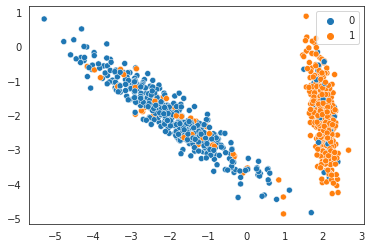

In [34]:
#X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0, n_informative=1,
#                             n_clusters_per_class=1, random_state=14)

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1,class_sep=2,flip_y=0.2,
                          weights=[0.5,0.5], random_state=17)
y = y[:,np.newaxis]
print(y.shape)
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));


## TESTING IMPLEMENTATIONS

Time: 0.16111469268798828


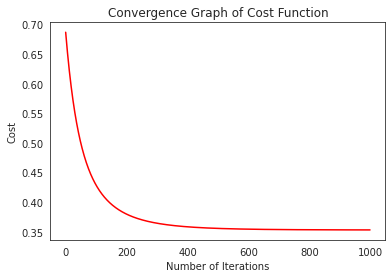

In [35]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1000
learning_rate =0.01

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = gradient_descent(X, y, params, 
                                 learning_rate, iterations)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Time: 0.3777627944946289


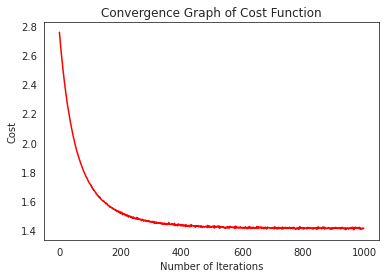

In [36]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1000
learning_rate =0.01

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = mini_batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations,mbs = 256)
end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Time: 0.18171977996826172


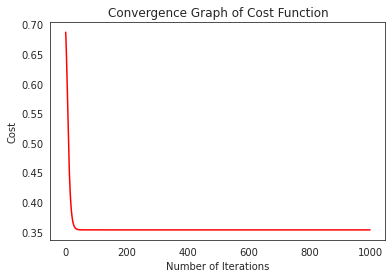

In [37]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1000
learning_rate =0.01

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = gradient_descent_mom(X, y, params, 
                                 learning_rate, iterations,Beta1=0.9)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Time: 3.7726223468780518


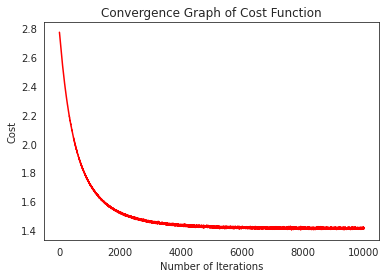

In [38]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = mini_batch_gradient_descent_mom(X, y, params, 
                                 learning_rate, iterations,mbs=256,Beta1=0.9)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Time: 0.4847569465637207


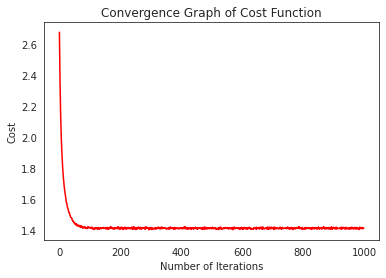

In [39]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1)) 
iterations = 1000
learning_rate =0.01

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = mini_batch_gradient_descent_Adam(X, y, params, 
                                 learning_rate, iterations,mbs=256,Beta1=0.9,Beta2=0.999)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [40]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}

df = df.replace({'Heart_Disease': mapping})
y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
        'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
        'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]
m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app
